# Titanic

## 1-Imports

We will start by importing the libraries that we will use to analyze, process and model the data.

In [85]:
# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2-Load Data

### 2.1-Understanding the datas and columns

We will load the data into Pandas DataFrames and understand the data : 
The dataset lists the passengers of the Titanic (890 in total). It is made up of 12 columns:
- “PassengerId” is his passenger ID aboard the Titanic.
- "Survived" is a numerical value ranging from 0 to 1, indicating whether this person survived the Titanic crash.
- “Pclass” indicates the class in which the passenger was traveling. 1 being the most luxurious and 3 the most dilapidated.
- "Name" is the full name of the person concerned. 
- "Sex" is the gender of the person. Male and Female.
- "Age" is the age of the person.
- "SibSp" is the number of brother(s) and sister(s) or spouse the person has onboard.
- "Parch" is the number of parents of the person onboard.
- "Ticket" is the ticket number of the person.
- "Fare" is the benefits gained on the ticket.
- "Cabin" is the cabin number of the person.
- "Embarked" is the port of embarkation of the person.

### 2.2-Make a priority for the tests about columns just with the data
We want to determinate the best data to train with our machine learning before making reportings

P1 : 
- Sex
- Age
- Pclass

P2 :
- Fare
- SibSp
- Parch

In [86]:
data = pd.read_csv("./data/csv/data.csv")
data

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
882,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
883,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
884,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3-Data Analysis

We will analyze the data to understand its structure and the relationship between the features.

### 3.1-Count the survived and deceaced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   886 non-null    int64  
 1   PassengerId  886 non-null    int64  
 2   Survived     886 non-null    int64  
 3   Pclass       886 non-null    int64  
 4   Name         886 non-null    object 
 5   Sex          886 non-null    object 
 6   Age          709 non-null    float64
 7   SibSp        886 non-null    int64  
 8   Parch        886 non-null    int64  
 9   Ticket       886 non-null    object 
 10  Fare         886 non-null    float64
 11  Cabin        202 non-null    object 
 12  Embarked     884 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.1+ KB


<Axes: xlabel='Survived', ylabel='count'>

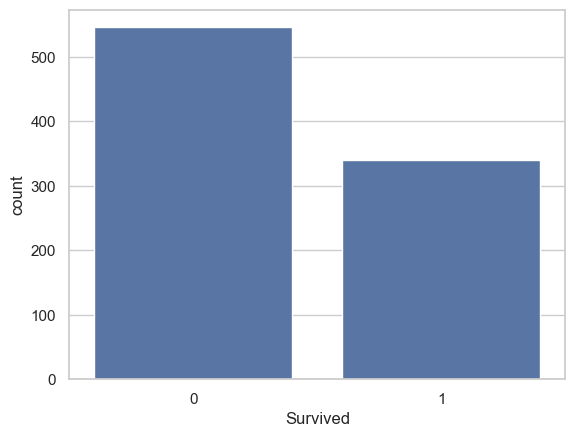

In [87]:
data.info()

data.describe()

data.head()

data.isnull().sum()

sns.countplot(x="Survived", data=data)

### 3.2-Count the survived and deceaced by gender

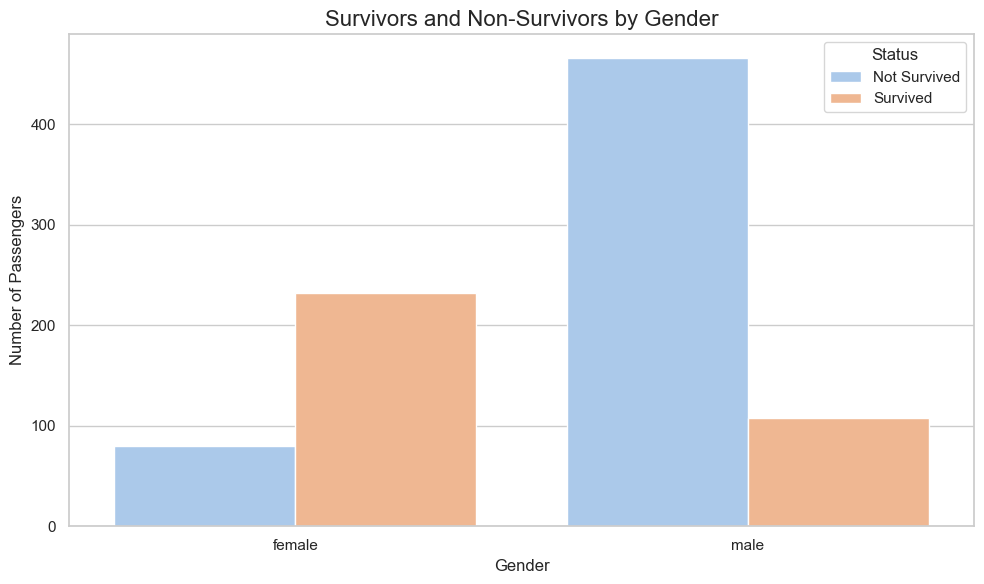

In [88]:
# Group the data by gender ('Sex') and survival status ('Survived')
# Count the number of passengers ('PassengerId') in each group
survival_by_sex = data.groupby(['Sex', 'Survived'])['PassengerId'].count().reset_index()

# Map survival status to more descriptive labels ('Non-Survécu' for 0 and 'Survécu' for 1)
survival_by_sex['Survived'] = survival_by_sex['Survived'].map({0: 'Not Survived', 1: 'Survived'})

# Set Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")

# Initialize a figure with custom size
plt.figure(figsize=(10, 6))

# Create a barplot with gender on the x-axis and passenger count on the y-axis
# Use 'Survived' as a hue to distinguish survival status
sns.barplot(
    x='Sex', 
    y='PassengerId', 
    hue='Survived', 
    data=survival_by_sex, 
    palette='pastel'
)

# Add title and axis labels to the plot
plt.title('Survivors and Non-Survivors by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)

# Customize the legend to provide clear information about survival status
plt.legend(title='Status')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the final plot
plt.show()

The first graph highlights a strong correlation between gender and survival. Female passengers had a much higher survival rate than males, regardless of the total number of passengers. Most male passengers did not survive, indicating that women may have been given priority during the evacuation, consistent with the "women and children first" protocol.

### 3.3-Count the survived and deceaced by category age

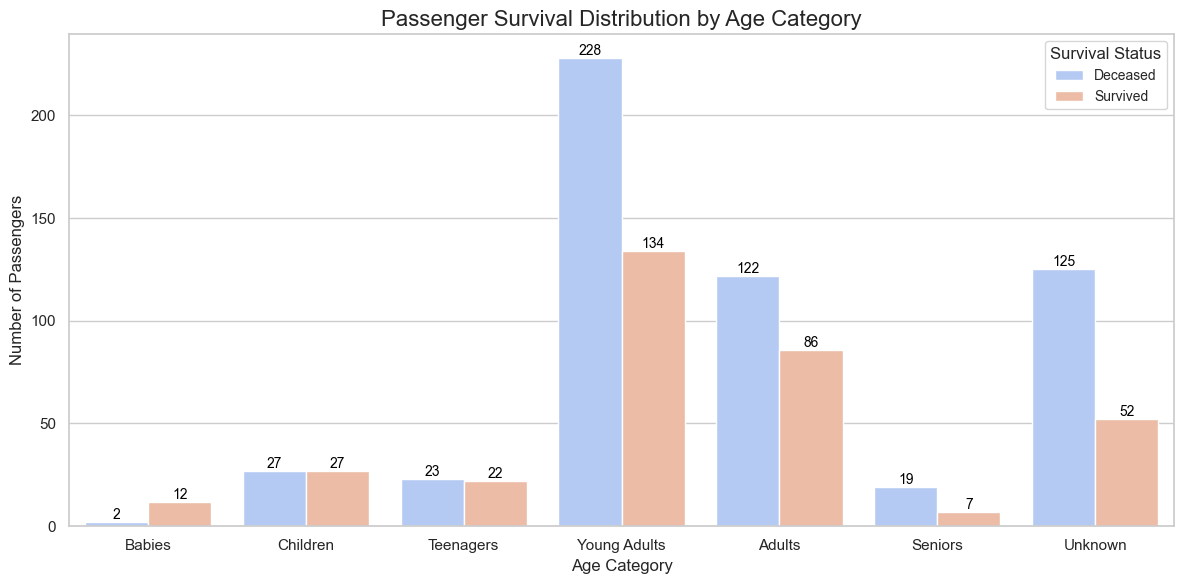

In [89]:
# Define age categories
def categorize_age(age):
    """
    Categorize age into defined groups:
    - Babies: Age < 2
    - Children: 2 <= Age < 12
    - Teenagers: 12 <= Age < 18
    - Young Adults: 18 <= Age < 35
    - Adults: 35 <= Age < 60
    - Seniors: Age >= 60
    """
    if age < 2:
        return 'Babies'
    elif 2 <= age < 12:
        return 'Children'
    elif 12 <= age < 18:
        return 'Teenagers'
    elif 18 <= age < 35:
        return 'Young Adults'
    elif 35 <= age < 60:
        return 'Adults'
    elif age >= 60:
        return 'Seniors'
    else:
        return 'Unknown'

# Apply the function to categorize passengers by age
data['AgeCategory'] = data['Age'].apply(categorize_age)

# Group data by age category and survival status
age_survival_distribution = (
    data.groupby(['AgeCategory', 'Survived'])['PassengerId']
    .count()
    .reset_index()
    .rename(columns={'PassengerId': 'PassengerCount'})
)

# Sort age categories in a logical order
category_order = ['Babies', 'Children', 'Teenagers', 'Young Adults', 'Adults', 'Seniors', 'Unknown']
age_survival_distribution['AgeCategory'] = pd.Categorical(
    age_survival_distribution['AgeCategory'], 
    categories=category_order, 
    ordered=True
)
age_survival_distribution.sort_values('AgeCategory', inplace=True)

# Map survival status for better legend readability
age_survival_distribution['Survived'] = age_survival_distribution['Survived'].map({0: 'Deceased', 1: 'Survived'})

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a bar plot with hue for survival status
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='AgeCategory', 
    y='PassengerCount', 
    hue='Survived', 
    data=age_survival_distribution, 
    palette='coolwarm'
)

# Add annotations for totals
for container in barplot.containers:
    # Add labels for each bar
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

# Add title and labels
plt.title('Passenger Survival Distribution by Age Category', fontsize=16)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Survival Status', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


The second graph demonstrates age-related trends in survival. Children and seniors had a higher proportion of survivors relative to their total group size, suggesting they may have been prioritized for rescue. Young adults had the highest number of non-survivors, likely reflecting their larger representation among passengers. Interestingly, adults had a survival rate close to the overall average, while there was a notable number of individuals in the "Unknown" category, which might reflect missing data on age.

### 3.4-Count the survived and deceaced by Pclass

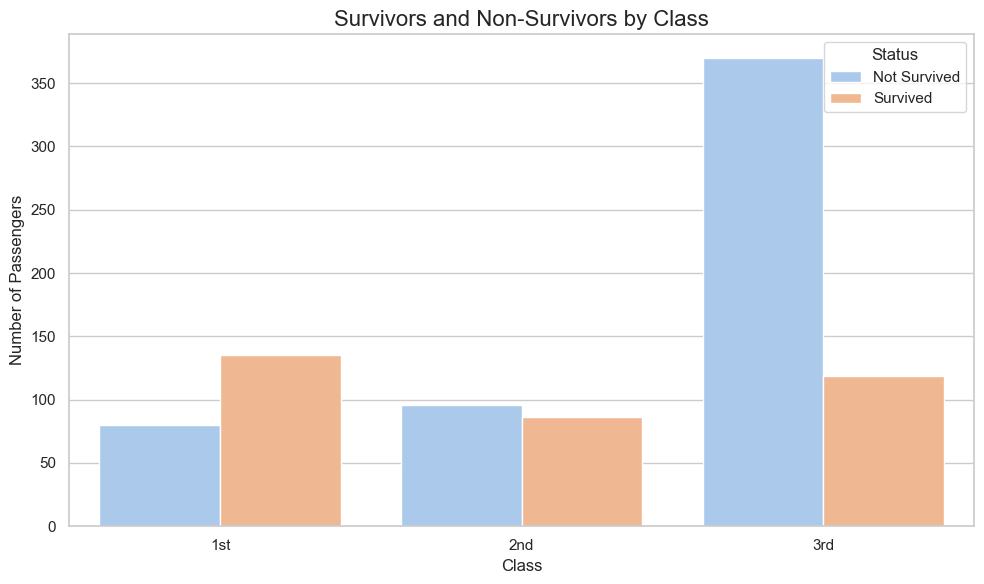

In [90]:
# Group the data by class ('Pclass') and survival status ('Survived')
# Count the number of passengers ('PassengerId') in each group
survival_by_class = data.groupby(['Pclass', 'Survived'])['PassengerId'].count().reset_index()

# Map survival status to more descriptive labels ('Not Survived' for 0 and 'Survived' for 1)
survival_by_class['Survived'] = survival_by_class['Survived'].map({0: 'Not Survived', 1: 'Survived'})

# Map the class numbers to more descriptive labels ('1st', '2nd', '3rd')
survival_by_class['Pclass'] = survival_by_class['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})

# Set Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")

# Initialize a figure with custom size
plt.figure(figsize=(10, 6))

# Create a barplot with class on the x-axis and passenger count on the y-axis
# Use 'Survived' as a hue to distinguish survival status
sns.barplot(
    x='Pclass', 
    y='PassengerId', 
    hue='Survived', 
    data=survival_by_class, 
    palette='pastel'
)

# Add title and axis labels to the plot
plt.title('Survivors and Non-Survivors by Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)

# Customize the legend to provide clear information about survival status
plt.legend(title='Status')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the final plot
plt.show()

The third graph reveals that survival rates were significantly influenced by passenger class. Passengers in the 1st class had the highest survival rates compared to the 2nd and 3rd classes, where survival rates decreased notably. The 3rd class had the largest number of non-survivors, indicating that socio-economic status and access to resources or priority for rescue played a crucial role in survival.

## 4-Translate the data to readable data for Machine Learning

In [91]:
# Fonction de catégorisation de l'âge
def categorize_age(age):
    """
    Categorize age into defined groups:
    - Babies: Age < 2
    - Children: 2 <= Age < 12
    - Teenagers: 12 <= Age < 18
    - Young Adults: 18 <= Age < 35
    - Adults: 35 <= Age < 60
    - Seniors: Age >= 60
    """
    if age < 2:
        return 1
    elif 2 <= age < 12:
        return 2
    elif 12 <= age < 18:
        return 3
    elif 18 <= age < 35:
        return 4
    elif 35 <= age < 60:
        return 5
    elif age >= 60:
        return 6
    else:
        return 0

# Appliquer la catégorisation de l'âge
data_transformed = data[['Pclass', 'Survived', 'Sex']].copy()
data_transformed['AgeCategory'] = data['Age'].apply(categorize_age)

# Encodage de la variable cible 'Sex'
le = LabelEncoder()
data_transformed['Sex'] = le.fit_transform(data_transformed['Sex'])

# Enregistrer le fichier transformé
file_destination = 'data/csv/data_transformed.csv'
data_transformed.to_csv(file_destination, index=False)

# Afficher un message de confirmation
print(f"Le fichier transformé a été sauvegardé sous '{file_destination}'.")
data_transformed

Le fichier transformé a été sauvegardé sous 'data/csv/data_transformed.csv'.


,Pclass,Survived,Sex,AgeCategory
0,3,0,1,4
1,1,1,0,5
2,3,1,0,4
3,1,1,0,5
4,3,0,1,5
...,...,...,...,...
881,2,0,1,4
882,1,1,0,4
883,3,0,0,0
884,1,1,1,4


## 5-Split it the data to train and test
We will use the RandomForest to begin, because it's the most apropriate to this dataset with the multiple conditions like AgeCategory, Sex and Pclass.

### 5.1 - Get the file

In [92]:
data_to_read = pd.read_csv("./data/csv/data_transformed.csv")
data_to_read

,Pclass,Survived,Sex,AgeCategory
0,3,0,1,4
1,1,1,0,5
2,3,1,0,4
3,1,1,0,5
4,3,0,1,5
...,...,...,...,...
881,2,0,1,4
882,1,1,0,4
883,3,0,0,0
884,1,1,1,4


### 5.2 - Get X (data) and Y (labels) for training & testing

In [93]:
doc = {
    "data": [],
    "label": [],
    "description": """
        data : 
            [
                Pclass,
                Sex,
                AgeCategory
            ],
        label : 
            [
                Survived (0 : No, 1 : Yes)
            ]
        """,    
}

for index, row in data_to_read.iterrows():
    doc["data"].append(
        [
            row.Pclass,
            row.Sex,
            row.AgeCategory
        ]
    )

    doc["label"].append(row.Survived)

### 5.3 - Separate the dataset into test dataset

In [170]:
x_train, x_test, y_train, y_test = train_test_split(doc["data"], doc["label"], test_size=0.2)

### 5.4 - Create and train the Random Forest 

In [171]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

### 5.5 - Make the prediction and see the confusion matrix

In [172]:
ypred = rfc.predict(x_test)
confusion_matrix(ypred, y_test)

array([[103,  21],
       [ 14,  40]])

### 5.6 - See the reporting of the test

In [173]:
print(classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       124
           1       0.66      0.74      0.70        54

    accuracy                           0.80       178
   macro avg       0.77      0.79      0.78       178
weighted avg       0.81      0.80      0.81       178



### 5.7 - Conclusion

**Metrics Overview**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0 (Not Survived)** | 0.90      | 0.82   | 0.86     | 123     |
| **1 (Survived)**     | 0.67      | 0.80   | 0.73     | 55      |

### **Overall Performance**
- **Accuracy**: 81%  
  \( \text{Correct predictions / Total predictions} = 0.81 \)
- **Macro Average**:
  - Precision: 78%
  - Recall: 81%
  - F1-Score: 79%
- **Weighted Average**:
  - Precision: 83%
  - Recall: 81%
  - F1-Score: 82%

---

## **Metric Descriptions**

1. **Precision**:
   - Represents the proportion of correct positive predictions out of all positive predictions made.
   - Formula:  
     \( \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} \)
   - A high precision means fewer false positives.

2. **Recall**:
   - Measures the proportion of true positives correctly identified out of all actual positives.
   - Formula:  
     \( \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} \)
   - A high recall indicates fewer false negatives.

3. **F1-Score**:
   - The harmonic mean of precision and recall, balancing both metrics.
   - Formula:  
     \( \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \)

4. **Support**:
   - The number of true samples for each class in the test set.

---

## **Analysis by Class**

### **Class 0 (Not Survived)**
- **Precision**: 90%  
  Among all instances predicted as "Not Survived," 90% were correct.
- **Recall**: 82%  
  Among all true "Not Survived" instances, 82% were correctly identified.
- **F1-Score**: 86%  
  Indicates a good balance between precision and recall for this class.

### **Class 1 (Survived)**
- **Precision**: 67%  
  Among all instances predicted as "Survived," 67% were correct.
- **Recall**: 80%  
  Among all true "Survived" instances, 80% were correctly identified.
- **F1-Score**: 73%  
  Slightly lower due to more false positives for this class.

---

## **Insights and Recommendations**

1. **Class Imbalance**:  
   The model performs better for the majority class (Class 0, Not Survived). This is expected due to the larger number of samples in this class (123 vs. 55).

2. **Performance on Minority Class (Class 1)**:
   - The lower precision (67%) indicates that the model predicts "Survived" more often than it should, leading to false positives.
   - However, a recall of 80% suggests that the model successfully identifies most of the actual survivors.

---

## **Suggestions for Improvement**

1. **Test with 10%**
2. **Test with 5%**
3. **Add some data**


## 6 - Test and train again..

### 6.1 - With 10 % of test

In [98]:
x_train, x_test, y_train, y_test = train_test_split(doc["data"], doc["label"], test_size=0.1)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [99]:
ypred = rfc.predict(x_test)
confusion_matrix(ypred, y_test)

array([[44, 14],
       [ 6, 25]])

In [100]:
print(classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81        58
           1       0.64      0.81      0.71        31

    accuracy                           0.78        89
   macro avg       0.76      0.78      0.76        89
weighted avg       0.80      0.78      0.78        89



### 6.2 - With 5 % of test

In [102]:
x_train, x_test, y_train, y_test = train_test_split(doc["data"], doc["label"], test_size=0.05)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [103]:
ypred = rfc.predict(x_test)
confusion_matrix(ypred, y_test)

array([[21,  8],
       [ 3, 13]])

In [104]:
print(classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        29
           1       0.62      0.81      0.70        16

    accuracy                           0.76        45
   macro avg       0.75      0.77      0.75        45
weighted avg       0.78      0.76      0.76        45



### 6.3 - Mini conclusion

As the size of the test set decreases, the model's performance metrics, particularly precision and recall, show a decline. This suggests the model's ability to generalize is impacted by reduced test data, potentially leading to less reliable evaluations of its true predictive capabilities.

### 6.4 - Add some data with Fare, SibSp and Parch

In [111]:
# Fonction de catégorisation de l'âge
def categorize_age(age):
    """
    Categorize age into defined groups:
    - Babies: Age < 2
    - Children: 2 <= Age < 12
    - Teenagers: 12 <= Age < 18
    - Young Adults: 18 <= Age < 35
    - Adults: 35 <= Age < 60
    - Seniors: Age >= 60
    """
    if age < 2:
        return 1
    elif 2 <= age < 12:
        return 2
    elif 12 <= age < 18:
        return 3
    elif 18 <= age < 35:
        return 4
    elif 35 <= age < 60:
        return 5
    elif age >= 60:
        return 6
    else:
        return 0

# Appliquer la catégorisation de l'âge
data_transformed_v2 = data[['Pclass', 'Survived', 'Sex', 'Fare', 'SibSp', 'Parch' ]].copy()
data_transformed_v2['AgeCategory'] = data['Age'].apply(categorize_age)

# Encodage de la variable cible 'Sex'
le = LabelEncoder()
data_transformed_v2['Sex'] = le.fit_transform(data_transformed_v2['Sex'])

scale = MaxAbsScaler()
data_transformed_v2['Fare'] = scale.fit_transform(data['Fare'].values.reshape(-1, 1))

# Enregistrer le fichier transformé
file_destination = 'data/csv/data_transformed_v2.csv'
data_transformed_v2.to_csv(file_destination, index=False)

# Afficher un message de confirmation
print(f"Le fichier transformé a été sauvegardé sous '{file_destination}'.")
data_transformed_v2

Le fichier transformé a été sauvegardé sous 'data/csv/data_transformed_v2.csv'.


,Pclass,Survived,Sex,Fare,SibSp,Parch,AgeCategory
0,3,0,1,0.014151,1,0,4
1,1,1,0,0.139136,1,0,5
2,3,1,0,0.015469,0,0,4
3,1,1,0,0.103644,1,0,5
4,3,0,1,0.015713,0,0,5
...,...,...,...,...,...,...,...
881,2,0,1,0.025374,0,0,4
882,1,1,0,0.058556,0,0,4
883,3,0,0,0.045771,1,2,0
884,1,1,1,0.058556,0,0,4


In [113]:
data_to_read = pd.read_csv("./data/csv/data_transformed_v2.csv")
data_to_read

,Pclass,Survived,Sex,Fare,SibSp,Parch,AgeCategory
0,3,0,1,0.014151,1,0,4
1,1,1,0,0.139136,1,0,5
2,3,1,0,0.015469,0,0,4
3,1,1,0,0.103644,1,0,5
4,3,0,1,0.015713,0,0,5
...,...,...,...,...,...,...,...
881,2,0,1,0.025374,0,0,4
882,1,1,0,0.058556,0,0,4
883,3,0,0,0.045771,1,2,0
884,1,1,1,0.058556,0,0,4


In [ ]:
doc = {
    "data": [],
    "label": [],
    "description": """
        data : 
            [
                Pclass,
                Sex,
                AgeCategory,
                Fare,
                SibSp,
                Parch
            ],
        label : 
            [
                Survived (0 : No, 1 : Yes)
            ]
        """,    
}

for index, row in data_to_read.iterrows():
    doc["data"][index].append(
        [
            row.Pclass,
            row.Sex,
            row.AgeCategory,
            row.Fare,
            row.SibSp,
            row.Parch
        ]
    )

    doc["label"].append(row.Survived)

#### Test with 20 %

In [122]:
x_train, x_test, y_train, y_test = train_test_split(doc["data"], doc["label"], test_size=0.2)

In [123]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [124]:
ypred = rfc.predict(x_test)
confusion_matrix(ypred, y_test)

array([[103,  27],
       [ 14,  34]])

In [125]:
print(classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       130
           1       0.56      0.71      0.62        48

    accuracy                           0.77       178
   macro avg       0.72      0.75      0.73       178
weighted avg       0.79      0.77      0.78       178



We can see, the precision of survived are falling down : 1 person / 2.. BUT if we test with 10% maybe we can have more than this, let's try !

#### Test with 10 % 

In [162]:
x_train, x_test, y_train, y_test = train_test_split(doc["data"], doc["label"], test_size=0.1)

In [163]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [164]:
ypred = rfc.predict(x_test)
confusion_matrix(ypred, y_test)

array([[50, 11],
       [ 5, 23]])

In [165]:
print(classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        61
           1       0.68      0.82      0.74        28

    accuracy                           0.82        89
   macro avg       0.79      0.82      0.80        89
weighted avg       0.84      0.82      0.82        89



Sometimes, I have very goods results like 100 % of good precision with "deceased" persons & 75% of good precision with "survived" persons, BUT sometimes I have very bad predictions..

# 7 - Conclusion

We observed that the results varied slightly or partially depending on the choice of relevant data used to train our AI. Additionally, as we reduced the test ratio, the variability in the results increased. 

However, one clear conclusion emerges: the AI is significantly more effective at predicting individuals who were not rescued compared to those who survived. This is largely influenced by the data available to us. Unfortunately, the dataset lacks sufficient information to make the AI as effective at predicting survivors of the disaster.